In [1]:
import numpy as np
from util import *
import os
import cv2
from matplotlib import pyplot as plt

from readData import *
from showFig import *
from showCloud import *
from warp import *

In [2]:
from Register import Register
rg = Register()

read in ..//nomarker//nomarker2.npy
x range: -32306 ~ 8510
y range: -5556 ~ 21488
z range: -71459 ~ 276916
read in ..//nomarker//nomarker3.npy
x range: -30321 ~ 8505
y range: -6008 ~ 21301
z range: -71448 ~ 260270
(70, 4)


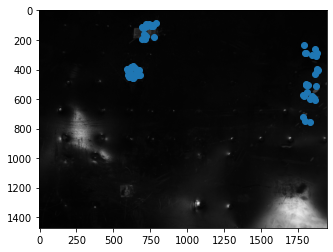

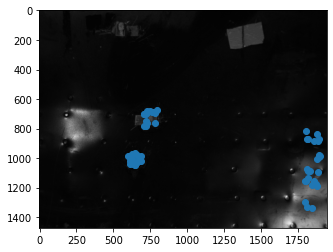

In [11]:
rg.loadData(["..//nomarker//nomarker2.npy", "..//nomarker//nomarker3.npy"])
rg.getMatch(debug=True)
point0, point1 = rg.register()
rg.clear()

read in ..//error//error0.npy
x range: -287946464 ~ 20298818
y range: -80889456 ~ 32730896
z range: -130721536 ~ 1880649216
read in ..//error//error1.npy
x range: -863 ~ 825
y range: -1548 ~ 1327
z range: -7966 ~ 13542
(6, 4)


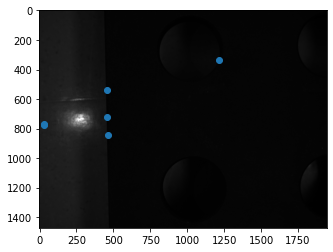

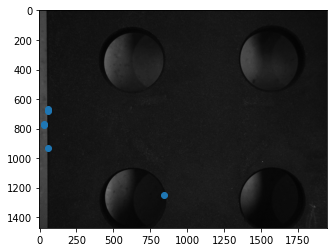

In [12]:
rg.loadData(["..//error//error0.npy", "..//error//error1.npy"])
rg.getMatch(eps=0.55, debug=True)
point0, point1 = rg.register()
rg.clear()

In [12]:
dcloud0 = filterPoints(point0, (800, 600, (-100, -30)), skip=50)
dcloud1 = filterPoints(point1, (800, 600, (-100, -30)), skip=50)

fig = dynVisual([dcloud0, dcloud1], ["0", "1"])
fig.write_html("nomarker.html")

In [3]:
def getMatch(names, eps=0.5, region=900, debug=False):
    points0, mat0 = getPoints(names[0])
    points1, mat1 = getPoints(names[1])
    # mat1 must under mat1
    # scroll down mat0 -> mat1 
    depth0 = points0[:,2].reshape((1472, 1944))
    depth1 = points1[:,2].reshape((1472, 1944))

    kp1, desc1 = get_AKAZE(depth0[:region])
    kp2, desc2 = get_AKAZE(depth1[-region:])
    matches = find_matches(desc1, desc2, eps)
    floatpoint = get_match_points(kp1, kp2, matches)

    # 2 options
    # points = np.around(floatpoint)
    points = np.int32(floatpoint)

    points[:, 3] += 1472 - region
    if debug:
        print(points.shape)
        plt.imshow(mat0, 'gray')
        plt.scatter(points[:, 0], points[:, 1])
        plt.show()

        plt.imshow(mat1, 'gray')
        plt.scatter(points[:, 2], points[:, 3])
        plt.show()

    return points


read in ..//nomarker//nomarker2.npy
x range: -32306 ~ 8510
y range: -5556 ~ 21488
z range: -71459 ~ 276916
read in ..//nomarker//nomarker3.npy
x range: -30321 ~ 8505
y range: -6008 ~ 21301
z range: -71448 ~ 260270
(70, 4)


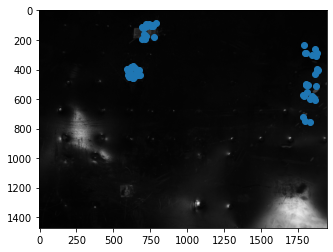

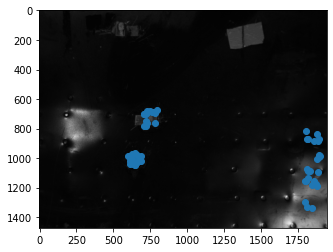

In [4]:
match = getMatch(["..//nomarker//nomarker2.npy", "..//nomarker//nomarker3.npy"], debug=True)